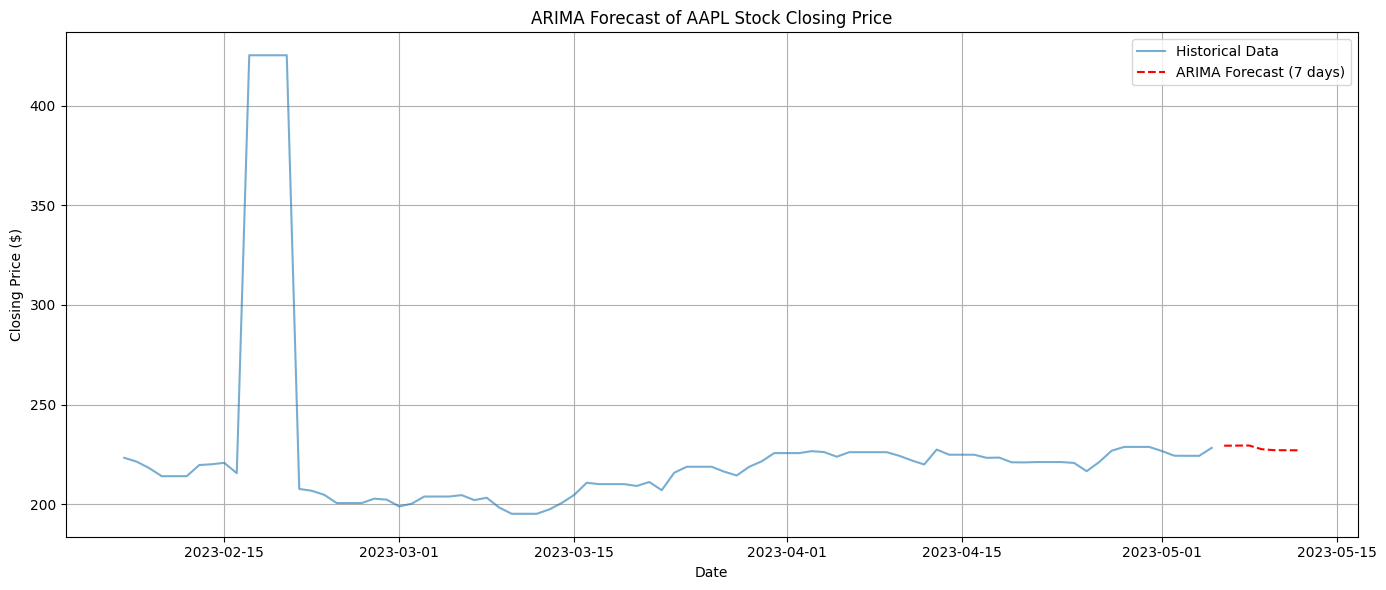

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load and prepare data
df = pd.read_csv("/content/dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Use daily closing price
# Group by date and take the mean closing price for any duplicate dates
daily_close = df["Close"].groupby(level=0).mean().asfreq("D").fillna(method='ffill')

# Fit ARIMA model
model = ARIMA(daily_close, order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 7 days
forecast = model_fit.forecast(steps=7)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_close, label="Historical Data", alpha=0.6)
plt.plot(forecast.index, forecast, label="ARIMA Forecast (7 days)", color='red', linestyle='--')
plt.title("ARIMA Forecast of AAPL Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()